In [1]:
#Setting matplotlib to be inline
%matplotlib inline

#Importing the necessary libraries
from os import listdir
from os.path import isfile, join

import re
import csv

import pandas as pd

from pylab import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#Set the root directory
root_dir = '.';

In [2]:
#Set the data directory
data_file = '';

#Printing file list
fileList = [f for f in listdir(root_dir) if f.endswith(".csv")]
print("Data files:")
print("\n".join(fileList))

Data files:
MATLAB_ModelFitting_191001.csv
MATLAB_ModelFitting_191002.csv
MATLAB_ModelFitting_highN-newdata-191002_191003.csv
MATLAB_ModelFitting_newdata-191002_191003.csv


In [3]:
rawModelFit = pd.read_csv('MATLAB_ModelFitting_newdata-191002_191003.csv')

In [4]:
rawModelFit.head()

,DNALength,DNA,vATP,vATPmodelSchemeIII,vATPmodelSchemeII,vATPmodelSchemeI
0,40,1,82.851636,208.890244,134.689631,328.590674
1,40,1,101.411718,208.890244,134.689631,328.590674
2,40,1,96.886606,208.890244,134.689631,328.590674
3,40,10,773.337182,1286.146235,1097.287033,1914.418990
4,40,10,747.381551,1286.146235,1097.287033,1914.418990


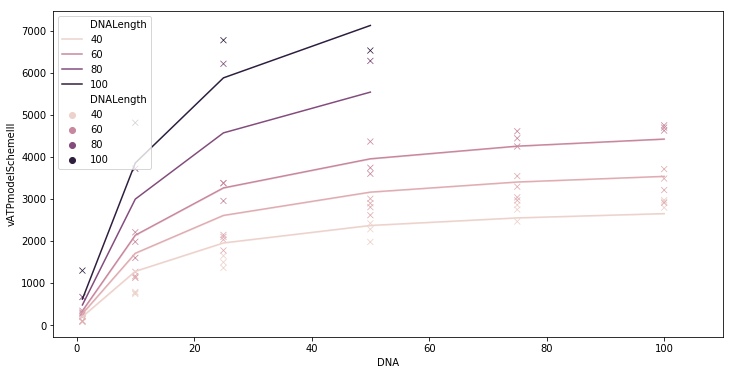

In [5]:
##I am going to plot the model statistics
fig1 = figure(figsize=(12,6))
ax1 = sns.scatterplot(x="DNA", y="vATP", hue="DNALength", data=rawModelFit, marker="x")
ax1.set_xlim(right=110)

ax1 = sns.lineplot(x="DNA", y="vATPmodelSchemeIII", hue="DNALength", data=rawModelFit)
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [6]:
model10bp = rawModelFit[rawModelFit['DNALength'] > 10]

In [7]:
model10bp.head()

,DNALength,DNA,vATP,vATPmodelSchemeIII,vATPmodelSchemeII,vATPmodelSchemeI
0,40,1,82.851636,208.890244,134.689631,328.590674
1,40,1,101.411718,208.890244,134.689631,328.590674
2,40,1,96.886606,208.890244,134.689631,328.590674
3,40,10,773.337182,1286.146235,1097.287033,1914.418990
4,40,10,747.381551,1286.146235,1097.287033,1914.418990


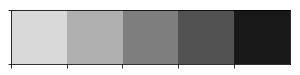

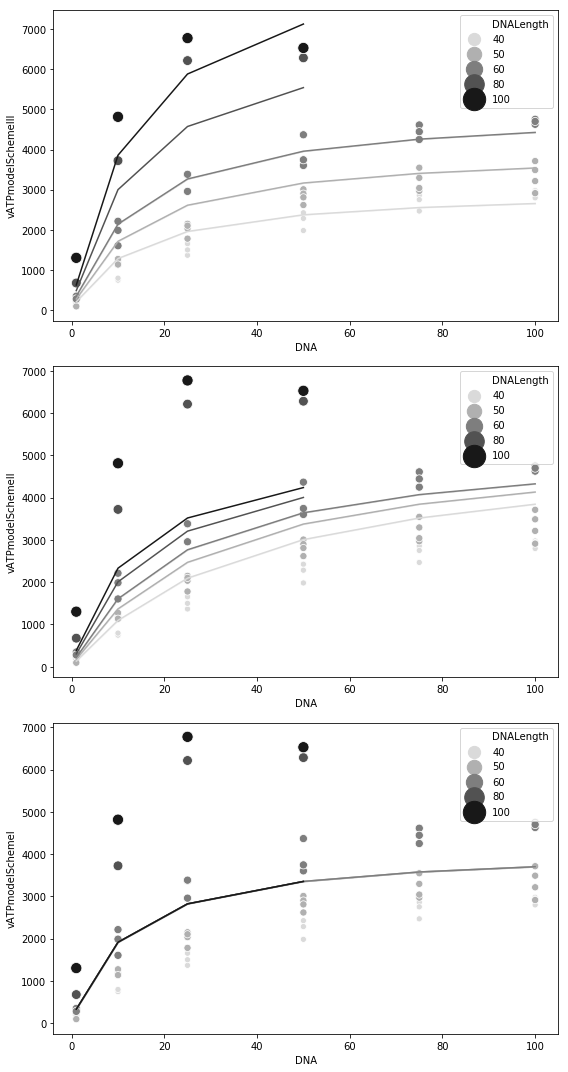

In [30]:
##I am going to plot the model statistics
greys = sns.color_palette("Greys_r", 11)
customPalette = sns.color_palette([greys[8], greys[6], greys[4], greys[2], greys[0]])
sns.palplot(sns.color_palette([greys[8], greys[6], greys[4], greys[2], greys[0]]))


fig1 = figure(figsize=(8,15))
ax1 = subplot(311)
ax1 = sns.scatterplot(x="DNA", y="vATP", hue="DNALength", size="DNALength", data=model10bp, sizes=(150,500), marker=".", legend="full", palette=customPalette)
#ax1.set_xlim(right=150)

ax1 = sns.lineplot(x="DNA", y="vATPmodelSchemeIII", hue="DNALength", data=model10bp, legend=None, palette=customPalette)
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

ax2 = subplot(312)
ax2 = sns.scatterplot(x="DNA", y="vATP", hue="DNALength", size="DNALength", data=model10bp, sizes=(150,500), marker=".", legend="full", palette=customPalette)
#ax2.set_xlim(right=150)

ax2 = sns.lineplot(x="DNA", y="vATPmodelSchemeII", hue="DNALength", data=model10bp, legend=None, palette=customPalette)
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

ax3 = subplot(313)
ax3 = sns.scatterplot(x="DNA", y="vATP", hue="DNALength", size="DNALength", data=model10bp, sizes=(150,500), marker=".", legend="full", palette=customPalette)
#ax3.set_xlim(right=150)

ax3 = sns.lineplot(x="DNA", y="vATPmodelSchemeI", hue="DNALength", data=model10bp, legend=None, palette=customPalette)
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()

#savefig(root_dir+'/modelFit_SchemeII_SchemeIII-10bp-site_newdata-191002_bw-191003.pdf', dpi=300, transparent=True, bbox_inches='tight')

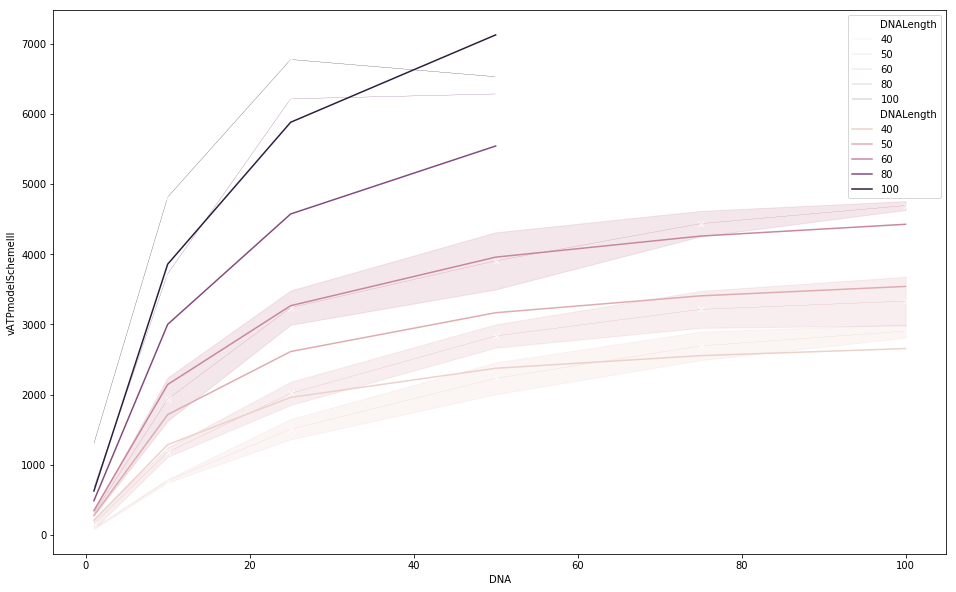

In [11]:
##I am going to plot the model statistics
fig1 = figure(figsize=(16,10))
ax1 = sns.lineplot(x="DNA", y="vATP", hue="DNALength", size="DNALength", data=model10bp, marker="x", ci="sd", err_style="band", legend="full", sizes=(0.25, 0.25))
#ax1.set_xlim(right=150)

ax1 = sns.lineplot(x="DNA", y="vATPmodelSchemeIII", hue="DNALength", data=model10bp, ci=None, legend="full")
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

savefig(root_dir+'/modelFit_SchemeIII-10bp_191001.pdf', dpi=300, transparent=True, bbox_inches='tight')

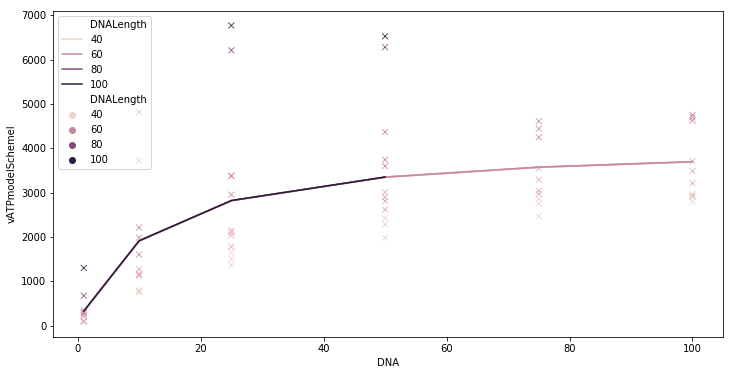

In [12]:
##I am going to plot the Nullmodel statistics
fig1 = figure(figsize=(12,6))
ax1 = sns.scatterplot(x="DNA", y="vATP", hue="DNALength", data=model10bp, marker="x")
#ax1.set_xlim(right=150)

ax1 = sns.lineplot(x="DNA", y="vATPmodelSchemeI", hue="DNALength", data=model10bp)
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [23]:
rawModelhighNFit = pd.read_csv('MATLAB_ModelFitting_highN-newdata-191002_191003.csv')

In [24]:
model10bphighN = rawModelFit[rawModelFit['DNALength'] < 80]

In [25]:
model10bphighN.head()

,DNALength,DNA,vATP,vATPmodelSchemeIII,vATPmodelSchemeII,vATPmodelSchemeI
0,40,1,82.851636,208.890244,134.689631,328.590674
1,40,1,101.411718,208.890244,134.689631,328.590674
2,40,1,96.886606,208.890244,134.689631,328.590674
3,40,10,773.337182,1286.146235,1097.287033,1914.418990
4,40,10,747.381551,1286.146235,1097.287033,1914.418990


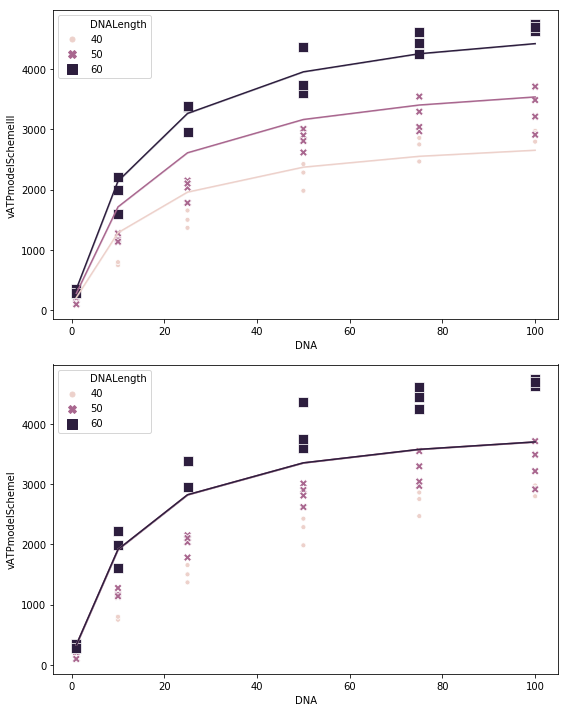

In [26]:
##I am going to plot the model statistics
fig1 = figure(figsize=(8,10))
ax1 = subplot(211)
ax1 = sns.scatterplot(x="DNA", y="vATP", hue="DNALength", size="DNALength", style="DNALength", data=model10bphighN, sizes=(25,100), marker=".", legend="full")
#ax1.set_xlim(right=150)

ax1 = sns.lineplot(x="DNA", y="vATPmodelSchemeIII", hue="DNALength", data=model10bphighN, legend=None)
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

ax2 = subplot(212)
ax2 = sns.scatterplot(x="DNA", y="vATP", hue="DNALength", size="DNALength", style="DNALength", data=model10bphighN, sizes=(25,100), marker=".", legend="full")
#ax3.set_xlim(right=150)

ax2 = sns.lineplot(x="DNA", y="vATPmodelSchemeI", hue="DNALength", data=model10bphighN, legend=None)
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.tight_layout()

#savefig(root_dir+'/modelFit_SchemeII_SchemeIII-10bp-site_highN-newdata-191002_191003.pdf', dpi=300, transparent=True, bbox_inches='tight')